## 패키지 설치

In [148]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import stemgraphic
from sklearn.preprocessing import StandardScaler
import scipy.stats as ss
from scipy.stats import norm 
from scipy import stats
import statsmodels.api as sm
import pylab

# 3-4

### (b)

In [57]:
# 데이터 가져오기

data = pd.read_table("copier_maintenance.txt", header=None, names = ["minutes", "copiers"])

df = pd.DataFrame(data)

# df = df.sort_values(by='minutes',ascending=True)

df.head()

,minutes,copiers
0,20,2
1,60,4
2,46,3
3,41,2
4,12,1


Text(0.5, 0, 'Number of copiers')

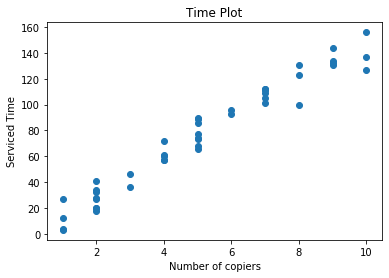

In [82]:
# 그래프 작성

x_values = df["copiers"][:, np.newaxis] # 카피머신 개수
y_values = df["minutes"][:, np.newaxis] # 서비스 시간

plt.scatter(x_values, y_values)

plt.title("Time Plot")
plt.ylabel("Serviced Time")
plt.xlabel("Number of copiers")

### (c)

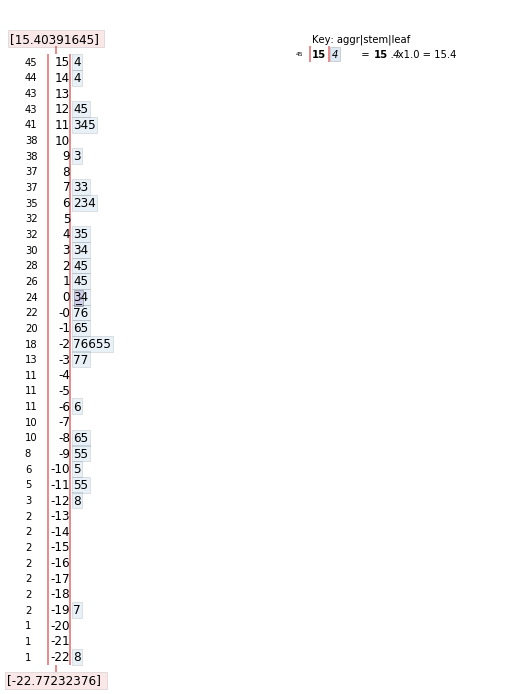

In [63]:
# stem and leaf 그래프(잔차)

x_values = df["copiers"][:, np.newaxis] # 카피머신 개수
y_values = df["minutes"][:, np.newaxis] # 서비스 시간

model = LinearRegression() # 회귀식

model.fit(x_values, y_values) # 학습

y_pred = model.predict(x_values) # 예측값

residuals = y_values - y_pred # 잔차 계산

fig, ax = stemgraphic.stem_graphic(residuals) # stem and leaf 그래프 그리는 함수

### (d)

Text(0.5, 0, 'Fitted')

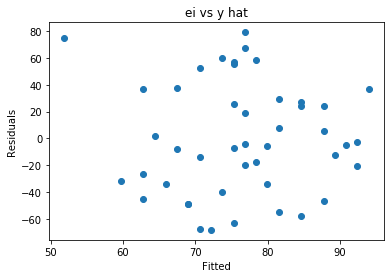

In [72]:
# 잔차 그래프

# 1. ei vs y^

graph1 = plt.scatter(y_pred, residuals)

plt.title("ei vs y hat")
plt.ylabel("Residuals")
plt.xlabel("Fitted")

Text(0.5, 0, 'xi')

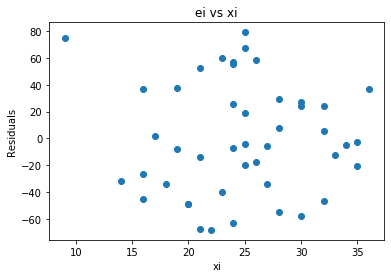

In [73]:
# 2. ei vs x

graph2 = plt.scatter(x_values, residuals)

plt.title("ei vs xi")
plt.ylabel("Residuals")
plt.xlabel("xi")

#### 해석

y hat과 xi는 서로 상관관계가 있는 독립변수와 종속변수로서 45번의 시행이 있으니 그에 비례하게 x값이 그래프에 찍히게됩니다. 그리고 y축은 residuals(잔차) 로 동일하기에 결국 x의 값만 다를 뿐 그래프의 모양은 동일하게 나오게 됩니다.

### (e)

In [172]:
# 정규 확률 그래프 그리기

# z-score 구하기

residuals_std = (residuals - residuals.mean(axis = 0)) / residuals.std(axis = 0)

# plt.scatter(residuals, z_score)

# plt.title("Normal Probability Plot")
plt.ylabel("Ordered Residuals"  )
plt.xlabel("Expected")
# plt.show()

### (f)

Text(0.5, 0, 'Number of copiers')

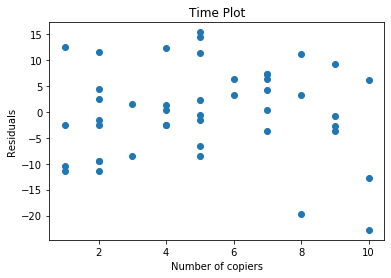

In [173]:
x_values = df["copiers"][:, np.newaxis]
y_values = df["minutes"][:, np.newaxis]


model = LinearRegression()

model.fit(x_values, y_values)
y_pred = model.predict(x_values)

residuals = y_values - y_pred

scatter = plt.scatter(x_values, residuals)

plt.title("Time Plot")
plt.ylabel("Residuals")
plt.xlabel("Number of copiers")

### (g)

In [199]:
# Breusch-Pagan


#1단계
sse = sum(residuals**2)

# 2단계
lm = LinearRegression()

lm.fit(x_values, residuals**2) # 학습

e_pred = model.predict(x_values) # 예측값

e_residuals = residuals**2 - e_pred
ssr = sum(e_residuals**2)
# ssr = sum(((sum(residuals**2)/45) - e_pred)**2) # 잔차 계산

# 3단계
x_bp = (ssr / 2) / (sse / 45)**2

print(x_bp)

[42.45259361]


### (h)

In [71]:
# 열 추가해서 비교

data2 = pd.read_table("Q3_4.txt", header = None, names = ["minutes", "copiers", "age", "year"])

df2 = pd.DataFrame(data2)

df2.head()

,minutes,copiers,age,year
0,20,2,20,4
1,60,4,19,5
2,46,3,27,4
3,41,2,32,1
4,12,1,24,4


Text(0.5, 0, 'X2(age)')

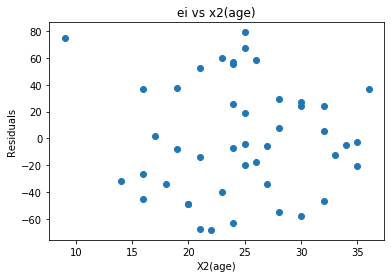

In [74]:
# residual vs x2(age)

x_values = df2["age"][:, np.newaxis]
y_values = df2["minutes"][:, np.newaxis]

model = LinearRegression() # 회귀식

model.fit(x_values, y_values) # 학습

y_pred = model.predict(x_values) # 예측값

residuals = y_values - y_pred # 잔차 계산

graph3 = plt.scatter(x_values, residuals)

plt.title("ei vs x2(age)")
plt.ylabel("Residuals")
plt.xlabel("X2(age)")

Text(0.5, 0, 'X3(year)')

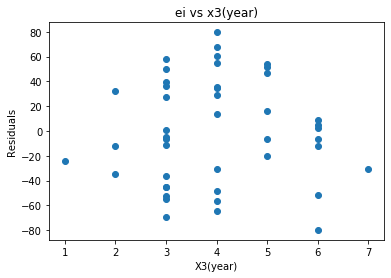

In [75]:
# residuals vs x3(year)

x_values = df2["year"][:, np.newaxis]
y_values = df2["minutes"][:, np.newaxis]

model = LinearRegression() # 회귀식

model.fit(x_values, y_values) # 학습

y_pred = model.predict(x_values) # 예측값

residuals = y_values - y_pred # 잔차 계산

graph3 = plt.scatter(x_values, residuals)

plt.title("ei vs x3(year)")
plt.ylabel("Residuals")
plt.xlabel("X3(year)")

## 3-5

### (b)

In [208]:
# 데이터 불러오기

airfreight_breakage = pd.read_table("Airfreight_breakage.txt", header = None, names = ["broken ampules", "transfers"])

airfreight_df = pd.DataFrame(airfreight_breakage)

airfreight_df.head()

,broken ampules,transfers
0,16.0,1.0
1,9.0,0.0
2,17.0,2.0
3,12.0,0.0
4,22.0,3.0


Text(0, 0.5, 'Broken ampules')

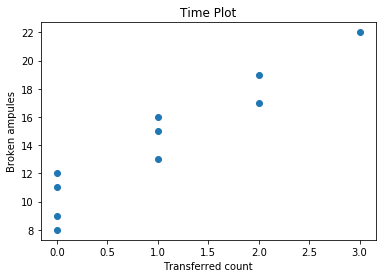

In [212]:
# Airfreight breakage Time plot 그리기

transfers = airfreight_df["transfers"][:, np.newaxis] # x 값
ampules = airfreight_df["broken ampules"][:, np.newaxis] # y 값

plt.scatter(transfers, ampules)

plt.title("Time Plot")
plt.xlabel("Transferred count")
plt.ylabel("Broken ampules")

### (c)

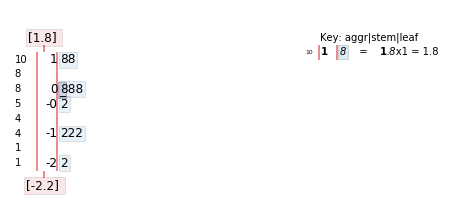

In [213]:
# Airfreight breakage Stem-and-Leaf 그리기

model = LinearRegression() # 회귀식

model.fit(transfers, ampules) # 학습

ampules_pred = model.predict(transfers) # 예측값

ampules_residuals = ampules - ampules_pred # 잔차 계산

figure, axis = stemgraphic.stem_graphic(ampules_residuals) # stem and leaf 그래프 그리는 함수

### (d)

Text(0, 0.5, 'Residuals')

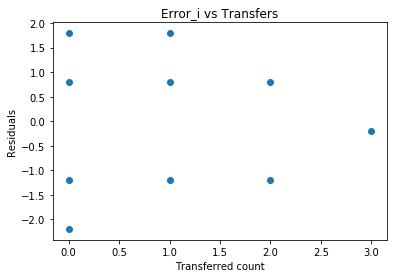

In [217]:
airfreight_plot = plt.scatter(transfers, ampules_residuals)

plt.title("Error_i vs Transfers")
plt.xlabel("Transferred count")
plt.ylabel("Residuals")

## 3-6

### (b)

### (e)